# 📓 Chapter 2B Notebook  
## Biomechanics: Motion, Energy, and Dissipation  
### *How the Human Body Moves*

> **Assumed background:**  
> - You completed Chapter 2A  
> - You are comfortable changing numbers and running cells  
> - You have **not** studied dynamics before

In this notebook, we extend biomechanics from **static forces** to **motion**.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Describe motion using position and time
- Model limb motion using a pendulum
- Understand angular motion at joints
- Estimate energy use during movement
- See how friction and resistance affect motion


---
## 🚶 Part 1 — Describing Motion

Motion means **position changes with time**.

We start by listing position values at different times.


In [1]:
# Time (seconds)
time = [0, 1, 2, 3, 4]

# Position (meters)
position = [0, 0.4, 0.8, 1.1, 1.3]

position

[0, 0.4, 0.8, 1.1, 1.3]

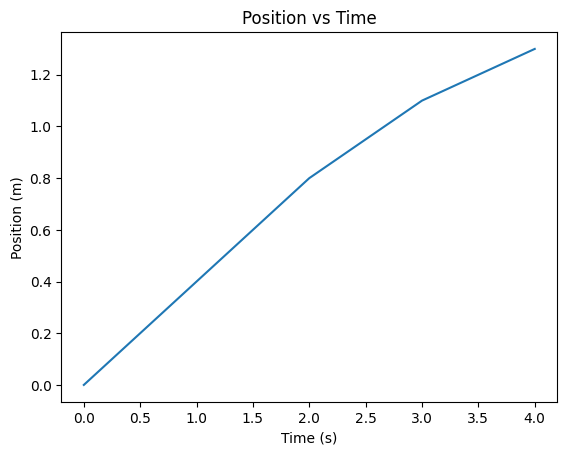

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time, position)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time")
plt.show()

The **slope** of this curve represents speed.

You do not need calculus — we focus on interpretation.


---
## 🦵 Part 2 — The Leg as a Pendulum

When you walk, your leg swings like a **pendulum**.

This is a powerful simplification used in biomechanics.


In [3]:
# Pendulum parameters
length = 1.0     # m (leg length)
g = 9.81         # m/s^2

period = 2 * 3.1416 * (length / g) ** 0.5 # Note that ** is an exponent in python. So ** 0.5 is a square root.
period

2.0060713717671796

This is the **time for one full swing**.

Longer legs → longer swing time.


### Try this
Change the leg length.
How much does the swing period change with a change in leg length?


---
## 🔄 Part 3 — Angular Motion at Joints

Joints rotate through angles.

We describe rotation using **angle vs time**.


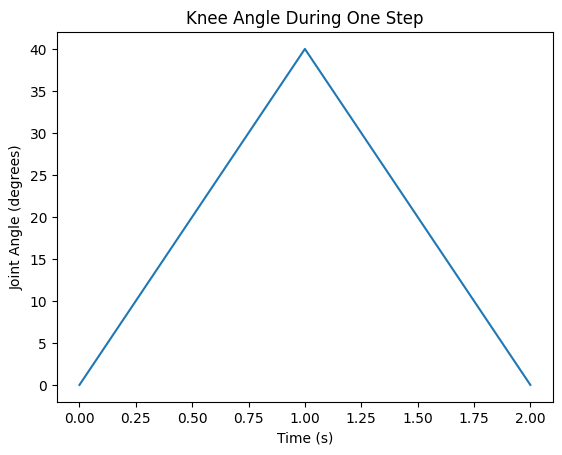

In [4]:
# Angle in degrees
time = [0, 0.5, 1.0, 1.5, 2.0]
angle = [0, 20, 40, 20, 0]

plt.plot(time, angle)
plt.xlabel("Time (s)")
plt.ylabel("Joint Angle (degrees)")
plt.title("Knee Angle During One Step")
plt.show()

Steeper curves mean **faster rotation**. A linear section of the plot suggests constant angular velocity.


---
## 🔋 Part 4 — Energy Consumption

Movement requires energy.

Kinetic energy depends on mass and speed.


In [5]:
# Mass of limb (kg)
mass = 10

# Speed (m/s)
speed = 1.2

kinetic_energy = 0.5 * mass * speed**2
kinetic_energy

7.199999999999999

### Interpretation
Heavier limbs or faster motion require more energy.


### Try this
Double the speed.
What happens to energy? Which variable matters more for energy expenditure, velocity or mass?


---
## 🧱 Part 5 — Friction and Resistance

Real motion always loses energy due to:
- Friction
- Tissue deformation
- Air resistance

These effects slow motion over time.

### Velocity decrease due to air resistance (quadratic drag)

From the lecture, the air resistance force is:

$$
F_{\text{air}} = \tfrac{1}{2} C_d A \rho v^2
$$

This force acts **opposite to the direction of motion**, so it slows the object down.
To convert force into a change in velocity, we use Newton’s second law:

$$
a = \frac{F}{m}
$$

Below, we simulate how velocity decreases over time using small time steps. 

We introduce numpy arrays as they are a staple of python math operations. We also introduce for loops to fill a list with our calculated values. When using loops in python, it uses the line indentation to know what lines of code are part of the loop, and which are not.



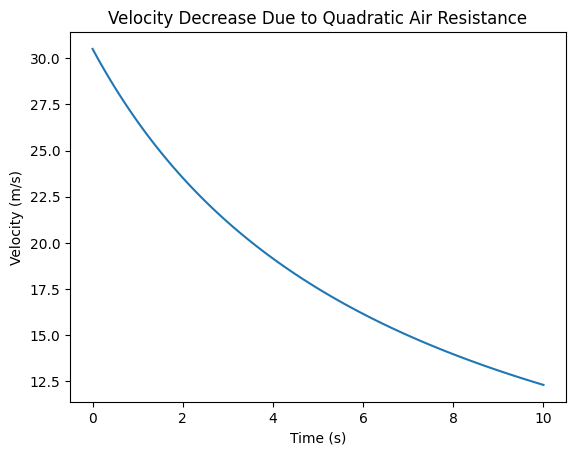

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Physical parameters ---
mass = 70.0        # kg
Cd = 0.8           # drag coefficient (order of magnitude for human)
A = 0.7            # cross-sectional area (m^2)
rho = 1.2          # air density (kg/m^3)

# --- Simulation parameters ---
dt = 0.1           # time step (s)
t_max = 10.0        # total time (s)

# --- Initial conditions ---
v = 30.5            # initial speed (m/s)

time = np.arange(0, t_max + dt, dt)
velocity = []
acceleration = []

# --- Time stepping loop ---
for t in time:
    velocity.append(v)
    
    # Air resistance force (opposes motion)
    F_air = 0.5 * Cd * A * rho * v**2
    
    # Acceleration due to drag
    a = -F_air / mass
    acceleration.append(a)
    
    # Update velocity
    v = v + a * dt

# --- Plot Velocity---
plt.plot(time, velocity)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Decrease Due to Quadratic Air Resistance")
plt.show()


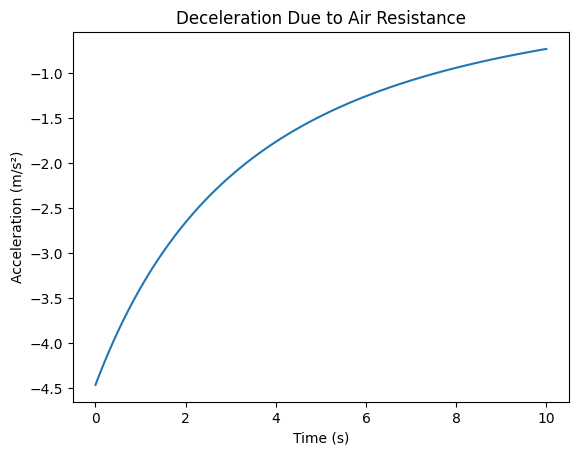

In [12]:

# --- Plot Acceleration---

plt.plot(time, acceleration)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Deceleration Due to Air Resistance")
plt.show()

### Interpreting the plots

- The velocity plot shows how the object slows down over time
- The acceleration plot shows how **the rate of slowing changes**
- At high speeds, air resistance is strong, leading to large negative acceleration
- As speed decreases, the drag force (∝ v²) becomes smaller, so the deceleration weakens


---
## 🧠 Big Picture Takeaways

- Motion introduces time and energy
- Limbs can be modeled as pendulums
- Energy costs increase rapidly with speed
- Resistance and friction matter

Together with Chapter 2A, this completes a **biomechanics toolkit**.


---
## ✅ Final Checklist

You should now be able to:

- [ ] Interpret motion graphs
- [ ] Explain limb swing using a pendulum model
- [ ] Describe angular motion at joints
- [ ] Explain why movement costs energy
- [ ] Understand the role of resistance

You are now ready to apply biomechanics to real biological systems.
